<a href="https://colab.research.google.com/github/Bhakti-M/Statistics-Machine-Learning/blob/main/Exercises_4_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import numpy as np
from scipy import stats

In [4]:
df = pd.read_csv('/content/data2.csv')

# Display the first few rows of the dataset
df.head()

,Profession,Income,Credit_card_number,Expiry,Security_code,Fraud
0,DOCTOR,42509,3.520000e+15,25-Jul,251,1.0
1,DOCTOR,80334,2.130000e+14,May-32,858,1.0
2,LAWYER,91552,4.870000e+15,30-Mar,755,1.0
3,LAWYER,43623,3.410000e+14,29-Jan,160,1.0
4,DOCTOR,22962,4.710000e+18,30-Nov,102,0.0


In [12]:
#Identify Missing Values
df.isnull().sum()

df.dtypes

,0
Profession,object
Income,object
Credit_card_number,float64
Expiry,object
Security_code,object
Fraud,float64


Impute missing values

In [13]:
# Impute with mean
df['Fraud'] = df['Fraud'].fillna(df['Fraud'].mean())

# Impute with mode
df['Income'] = df['Income'].fillna(df['Income'].mode()[0])
df['Security_code'] = df['Security_code'].fillna(df['Security_code'].mode()[0])


In [ ]:
print(df.isnull().sum())

Profession            0
Income                0
Credit_card_number    0
Expiry                0
Security_code         0
Fraud                 0
dtype: int64


Scaling Data:

In [14]:
# Scaling of Data

import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Select only numerical features for scaling
numerical_features = df.select_dtypes(include=['number']).columns
numerical_df = df[numerical_features]

# 1. Standardization (Z-Score Scaling)
scaler = StandardScaler()
data_standardized = scaler.fit_transform(numerical_df)
print("Standardized Data:\n", data_standardized)

# 2. Min-Max Scaling
minmax_scaler = MinMaxScaler()
data_minmax = minmax_scaler.fit_transform(numerical_df)
print("Min-Max Scaled Data:\n", data_minmax)

Standardized Data:
 [[-0.30337881  0.97686748]
 [-0.30600778  0.97686748]
 [-0.30230561  0.97686748]
 ...
 [-0.30221021  0.97686748]
 [-0.30233741  0.97686748]
 [-0.30227381  0.97686748]]
Min-Max Scaled Data:
 [[7.03987928e-04 1.00000000e+00]
 [4.25879199e-05 1.00000000e+00]
 [9.73987931e-04 1.00000000e+00]
 ...
 [9.97987931e-04 1.00000000e+00]
 [9.65987931e-04 1.00000000e+00]
 [9.81987931e-04 1.00000000e+00]]


Handling Noise:

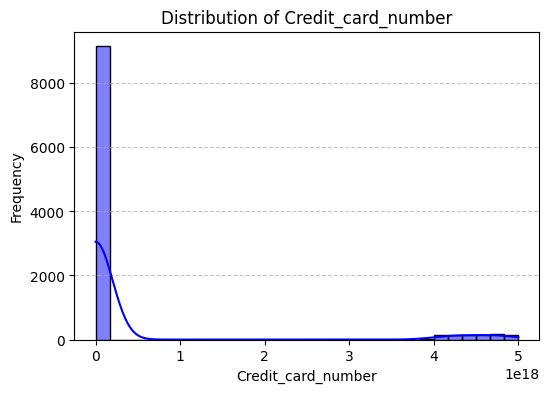

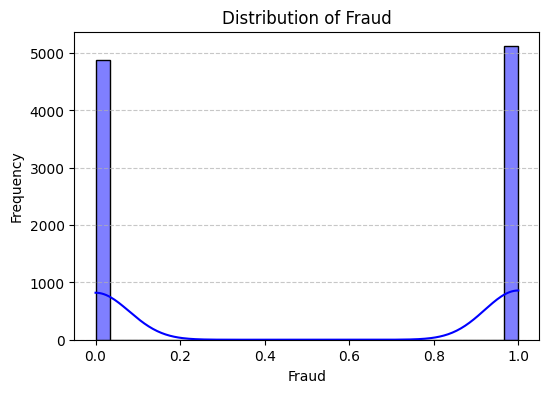

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Plot histograms for understanding about the noise
numerical_columns = ['Credit_card_number','Fraud']
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

     Profession Income  Credit_card_number  Expiry Security_code  Fraud  \
0        DOCTOR  42509        3.520000e+15  25-Jul           251    1.0   
1        DOCTOR  80334        2.130000e+14  May-32           858    1.0   
2        LAWYER  91552        4.870000e+15  30-Mar           755    1.0   
3        LAWYER  43623        3.410000e+14  29-Jan           160    1.0   
4        DOCTOR  22962        4.710000e+18  30-Nov           102    0.0   
...         ...    ...                 ...     ...           ...    ...   
9995     DOCTOR   2705        5.020000e+11  27-Sep           422    1.0   
9996     LAWYER  37862        3.490000e+14  Jul-34           811    0.0   
9997   ENGINEER  83152        4.990000e+15  24-Nov           216    1.0   
9998     DOCTOR  90620        4.830000e+15  Jan-33           180    1.0   
9999     LAWYER  94529        4.910000e+15  29-Dec           399    1.0   

      Fraud_noisy  Fraud_cleaned  Credit_card_number_noisy  
0        1.248357       1.248357      

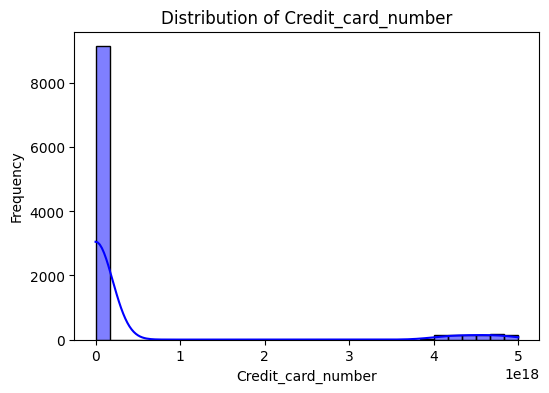

In [28]:
import pandas as pd
import numpy as np

np.random.seed(42)


# Generate random noise
# Gaussian noise with mean=0 and standard deviation=0.5
noise = np.random.normal(0, 0.5, size=df['Credit_card_number'].shape)


# Inject noise
df['Credit_card_number_noisy'] = df['Credit_card_number'] + noise

print(df)

numerical_columns = ['Credit_card_number']
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

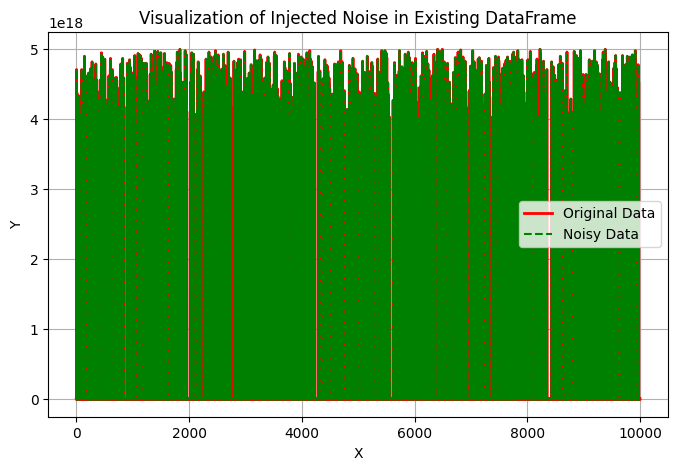

In [31]:
# Visualize Original Data, Noisy Data, and the Noise
plt.figure(figsize=(8, 5))


plt.plot(df['Credit_card_number'], label='Original Data', linewidth=2, color='red')

plt.plot(df['Credit_card_number_noisy'], label='Noisy Data', linestyle='--', color='green')

# Add labels, legend, and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Visualization of Injected Noise in Existing DataFrame')
plt.legend()
plt.grid(True)


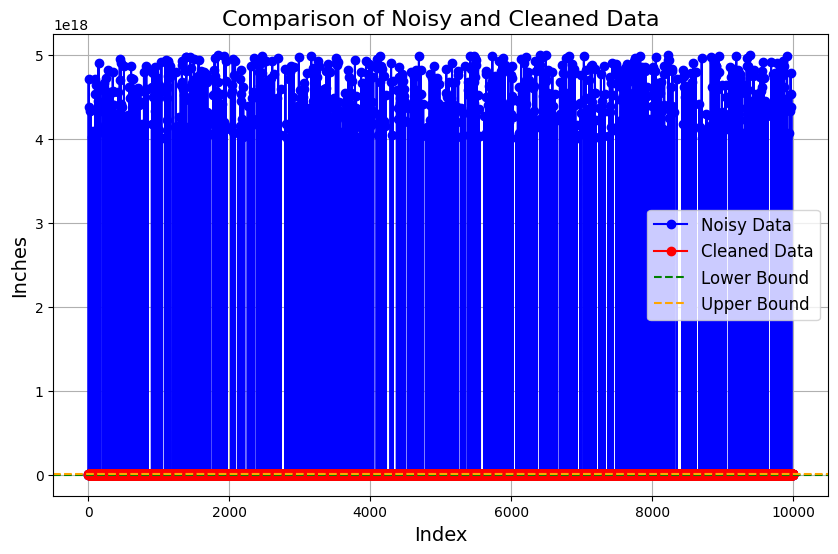

In [33]:
# Removal of noise using Interquartile method
Q1 = df['Credit_card_number_noisy'].quantile(0.25)
Q3 = df['Credit_card_number_noisy'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['Credit_card_number_cleaned'] = df['Credit_card_number_noisy'].clip(lower=lower_bound, upper=upper_bound)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Credit_card_number_noisy'], 'o-', label='Noisy Data', color='blue')
plt.plot(df.index, df['Credit_card_number_cleaned'], 'o-', label='Cleaned Data', color='red')
plt.title('Comparison of Noisy and Cleaned Data', fontsize=16)
plt.xlabel('Index', fontsize=14)
plt.ylabel('Inches', fontsize=14)
plt.axhline(y=lower_bound, color='green', linestyle='--', label='Lower Bound')
plt.axhline(y=upper_bound, color='orange', linestyle='--', label='Upper Bound')
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


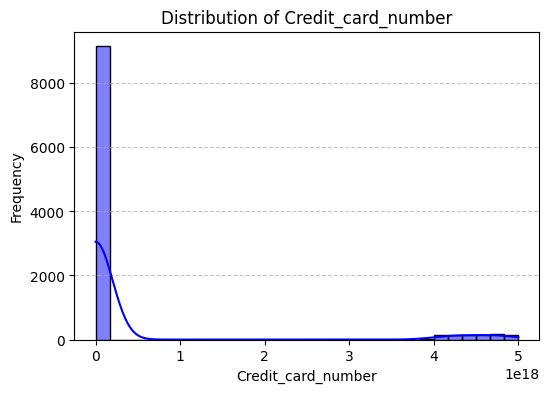

In [34]:
numerical_columns = ['Credit_card_number']
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

Handling Outliers:

In [35]:
# Z-scores for the 'Credit_card_number' column
z_scores = stats.zscore(df['Credit_card_number'])
outliers_indices = np.where(np.abs(z_scores) > 3)[0]

outliers = df.iloc[outliers_indices]

print("Outliers detected in 'Credit_card_number':")
print(outliers)

Outliers detected in 'Credit_card_number':
     Profession Income  Credit_card_number  Expiry Security_code  Fraud  \
4        DOCTOR  22962        4.710000e+18  30-Nov           102    0.0   
10     ENGINEER  18932        4.380000e+18  Sep-32           637    0.0   
26       DOCTOR  22144        4.330000e+18  27-Jun           457    1.0   
34       DOCTOR  86553        4.340000e+18  Dec-33           282    0.0   
96       LAWYER  19204        4.710000e+18  30-May          3416    0.0   
...         ...    ...                 ...     ...           ...    ...   
9916     DOCTOR  37477        4.980000e+18  29-May           459    1.0   
9954     LAWYER  80838        4.330000e+18  Sep-32           311    0.0   
9966     LAWYER  35065        4.780000e+18  30-Jul           480    1.0   
9976     DOCTOR  35977        4.380000e+18  30-Jun            43    0.0   
9977     DOCTOR  23450        4.530000e+18  30-Apr           107    0.0   

      Fraud_noisy  Fraud_cleaned  Credit_card_number_noi

In [38]:
df_no_outliers = df.drop(outliers_indices)
df.head()

,Profession,Income,Credit_card_number,Expiry,Security_code,Fraud,Fraud_noisy,Fraud_cleaned,Credit_card_number_noisy,Credit_card_number_cleaned
0,DOCTOR,42509,3.520000e+15,25-Jul,251,1.0,1.248357,1.248357,3.520000e+15,3.520000e+15
1,DOCTOR,80334,2.130000e+14,May-32,858,1.0,0.930868,0.930868,2.130000e+14,2.130000e+14
2,LAWYER,91552,4.870000e+15,30-Mar,755,1.0,1.323844,1.323844,4.870000e+15,4.870000e+15
3,LAWYER,43623,3.410000e+14,29-Jan,160,1.0,1.761515,1.761515,3.410000e+14,3.410000e+14
4,DOCTOR,22962,4.710000e+18,30-Nov,102,0.0,-0.117077,-0.117077,4.710000e+18,1.121125e+16


In [43]:
from sklearn.preprocessing import LabelEncoder

df_new= df.drop(columns= ['Expiry','Fraud_noisy','Fraud_cleaned','Credit_card_number_noisy','Credit_card_number_cleaned'])
label_encoder = LabelEncoder()

df_new['Profession_encoded'] = label_encoder.fit_transform(df['Profession'])

df_new

,Profession,Income,Credit_card_number,Security_code,Fraud,Profession_encoded
0,DOCTOR,42509,3.520000e+15,251,1.0,0
1,DOCTOR,80334,2.130000e+14,858,1.0,0
2,LAWYER,91552,4.870000e+15,755,1.0,2
3,LAWYER,43623,3.410000e+14,160,1.0,2
4,DOCTOR,22962,4.710000e+18,102,0.0,0
...,...,...,...,...,...,...
9995,DOCTOR,2705,5.020000e+11,422,1.0,0
9996,LAWYER,37862,3.490000e+14,811,0.0,2
9997,ENGINEER,83152,4.990000e+15,216,1.0,1
9998,DOCTOR,90620,4.830000e+15,180,1.0,0


Feature Selection:

In [52]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 1. Filter Method (Correlation)
X = df_new.drop(["Fraud","Profession"], axis=1)
y = df_new["Fraud"]

# Select only numerical features for correlation calculation
numerical_features = X.select_dtypes(include=['number']).columns
X_numerical = X[numerical_features]

# Calculate correlations on numerical features only
X_numerical.corr()

# 2. Wrapper Methods (Recursive Feature Elimination)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now select only numerical features from the train and test sets
X_train = X_train.select_dtypes(include=['number'])
X_test = X_test.select_dtypes(include=['number'])

model = LinearRegression()


rfe = RFE(estimator=model)
rfe.fit(X_train, y_train)

selected_features = X_train.columns[rfe.support_]  # Use X_train columns
print("Selected Features:", selected_features)



model.fit(X_train, y_train)
score = model.score(X_test, y_test)

print(f"Model R^2 Score with Selected Features: {score:.4f}")


Selected Features: Index(['Credit_card_number'], dtype='object')
Model R^2 Score with Selected Features: -0.0000


In [53]:
# 3. Embedded Methods (Lasso regression)

from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


lasso = Lasso(alpha=0.1, random_state=42)
lasso.fit(X_train_scaled, y_train)


score = lasso.score(X_test_scaled, y_test)
print(f"\nModel R^2 Score: {score:.4f}")


Model R^2 Score: -0.0000
